In [126]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from dateutil import parser
import colorlover as cl



In [166]:
df = pd.read_csv("../data/notebook/brendan_hickey.csv")

#author,sha,eco,project,when,ac_flag,pkg_change
#Jack Moffitt <jack@cactus.local>,1014e4ddb347967c3a24e2ef3df0b10175546520,NPM,2k13yr_strophejs,2012-04-18 08:28:31-07:00,False,True

print len(df)
df = df[pd.notnull(df.when)]
print len(df)
focal_author = df.iloc[0].author
df['month'] = df.apply(lambda row: str(row["when"])[0:7], axis=1)
#df = df[df.author==focal_author]
print len(df.author==focal_author)
df.head()

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning:

Columns (2,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.



120052
120032
120032


,author,sha,eco,study,project,when,ac_flag,pkg_change,differences,month
0,Brendan Hickey <bhickey@google.com>,00485987f0610b12bc0783ac3a15b66e049d6bdb,NaN,0,crawl_crawl,2013-04-07 12:54:50-07:00,False,False,NaN,2013-04
1,Brendan Hickey <bhickey@google.com>,006e782bcba2a28d769fef1257d066eb36f67d7c,NaN,0,4Hooves2Appendages_crawl,2013-03-31 12:26:41-07:00,False,False,NaN,2013-03
2,Brendan Hickey <bhickey@google.com>,0081719e80ca6b8f481c62f92ea268b31cde6ca5,NaN,0,bhickey_skynet,2011-12-07 23:54:34-08:00,False,False,NaN,2011-12
3,Brendan Hickey <bhickey@google.com>,00a0082d11a61756c8aa6c2b0f87ef154777a295,NaN,0,4Hooves2Appendages_crawl,2013-03-28 22:56:50-07:00,True,False,NaN,2013-03
4,Brendan Hickey <bhickey@google.com>,00ac9bc19cb9dab331e902372e0f9798505d0d7b,NaN,0,4Hooves2Appendages_crawl,2013-06-08 14:46:40-07:00,True,False,NaN,2013-06


In [168]:
def unique2index(items):
    ix = {}
    for i in items: ix[i] = len(ix)
    return ix
eco_index = unique2index(df.eco.unique())
pkg_index = unique2index(df.sort_values("eco").project.unique())

colorscale = cl.scales[str(len(eco_index))]['div']['RdYlBu']
trace = go.Scatter(y = [pkg_index[p] for p in df.project], 
                   x = [parser.parse(t) for t in df.when], 
                   marker=go.Marker(
                       line=go.Line(color='black',width=1),
                       symbol = df.pkg_change,
                       
                       color=[colorscale[eco_index[e]] for e in df.eco]),
                   text = [str(e) for e in df.eco],
                   showlegend = True,
                   mode="markers")
layoutt = dict(yaxis=dict(tickvals = range(len(pkg_index)), ticktext = pkg_index.keys(), showticklabels=True))

KeyError: nan

In [ ]:
#plotly.offline.plot(go.Figure(data=[trace], layout=layoutt), auto_open=False)

In [76]:
for t in df.when:
    try:
        x = parser.parse(t)
    except Exception, e:
        print e, type(e), t, type(t)

In [84]:
cl.scales['3']['div']['RdYlBu']

['rgb(252,141,89)', 'rgb(255,255,191)', 'rgb(145,191,219)']

In [102]:
The new graph would go like this:
    * treat the first commit's author as the focal author
    * touches per month by category (ecosystem, study status, focal/nonfocal author) divided by category package count
    * graph that shit

['NPM',
 'nan',
 'nan',
 'NPM',
 'NPM',
 'NPM',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'NPM',
 'nan',
 'nan',
 'nan',
 'NPM',
 'nan',
 'NPM',
 'nan',
 'NPM',
 'NPM',
 'NPM',
 'nan',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'nan',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'Cargo',
 'nan',
 'Cargo',
 'Cargo',
 'nan',
 'nan',
 'nan',
 'Cargo',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'Cargo',
 'NPM',
 'Cargo',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'Cargo',
 'Cargo',
 'Cargo',
 'NPM',
 'nan',
 'nan',
 'NPM',
 'NPM',
 'nan',
 'nan',
 'nan',
 'nan',
 'Cargo',
 'nan',
 'nan']

In [170]:
df.head()

,author,sha,eco,study,project,when,ac_flag,pkg_change,differences,month
0,Brendan Hickey <bhickey@google.com>,00485987f0610b12bc0783ac3a15b66e049d6bdb,NaN,0,crawl_crawl,2013-04-07 12:54:50-07:00,False,False,NaN,2013-04
1,Brendan Hickey <bhickey@google.com>,006e782bcba2a28d769fef1257d066eb36f67d7c,NaN,0,4Hooves2Appendages_crawl,2013-03-31 12:26:41-07:00,False,False,NaN,2013-03
2,Brendan Hickey <bhickey@google.com>,0081719e80ca6b8f481c62f92ea268b31cde6ca5,NaN,0,bhickey_skynet,2011-12-07 23:54:34-08:00,False,False,NaN,2011-12
3,Brendan Hickey <bhickey@google.com>,00a0082d11a61756c8aa6c2b0f87ef154777a295,NaN,0,4Hooves2Appendages_crawl,2013-03-28 22:56:50-07:00,True,False,NaN,2013-03
4,Brendan Hickey <bhickey@google.com>,00ac9bc19cb9dab331e902372e0f9798505d0d7b,NaN,0,4Hooves2Appendages_crawl,2013-06-08 14:46:40-07:00,True,False,NaN,2013-06


In [171]:
# each month, 
#   commits per ECOSYSTEM by focal author
#   commits per ECOSYTEM by anyone
#   pkg_change commits by focal author and ecosystem
#   pkg_change commits by anyone per ecosystem
cef = df[df.author==focal_author].groupby(["eco","month"]).count()
cea = df.groupby(["eco","month"]).count()
pef = df[df.author==focal_author][df.pkg_change==True].groupby(["eco","month"]).count()
pea = df[df.pkg_change==True].groupby(["eco","month"]).count()

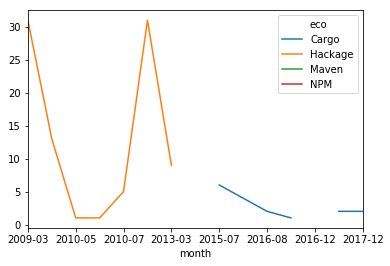

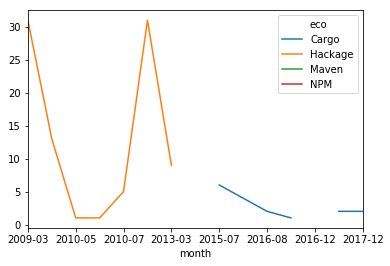

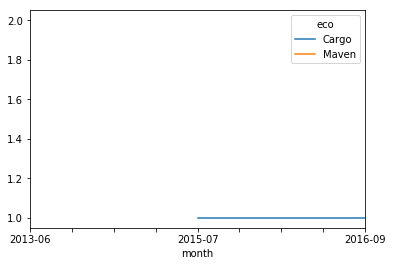

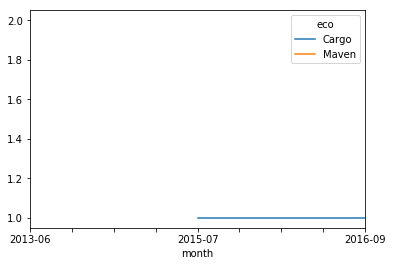

In [172]:
%matplotlib inline
cef.sha.unstack(level=0).plot()
cea.sha.unstack(level=0).plot()
pef.sha.unstack(level=0).plot()
pea.sha.unstack(level=0).plot()

In [174]:

df[df.pkg_change==True]

,author,sha,eco,study,project,when,ac_flag,pkg_change,differences,month
1196,Brendan Hickey <bhickey@google.com>,a08b38d36c4f2f8c6a3c70fdae84dd388c535c47,Maven,0,bhickey_doppelsprecher,2013-06-26 00:09:26-07:00,False,True,set([' \t<groupId>com.google.code.gson</gro...,2013-06
1410,Brendan Hickey <bhickey@google.com>,bd03e353d1696c10b290865da7e92df9727acfdd,Maven,0,bhickey_doppelsprecher,2013-06-25 23:35:54-07:00,False,True,?,2013-06
1433,Brendan Hickey <bhickey@google.com>,c0c2dbe6e5252b8802417971fa20d853939704a4,Cargo,1,bhickey_fence,2016-09-17 11:14:29-04:00,True,True,?,2016-09
1551,Brendan Hickey <bhickey@google.com>,cf75d35e1f31ad5d92a04ad08a16b7e27efe96f9,Cargo,0,bhickey_binomial.rs,2015-07-26 19:28:29-04:00,True,True,?,2015-07
